# Week4 - Lab

### Complete _todo_ parts in the following:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
def create_df():
    df = pd.DataFrame()
    n = 10000
    x = np.linspace(0, 2*np.pi, n)
    y = 2*np.cosh(x/2) + np.random.normal(0, 3, n)

    x2 = random.choices(['A', 'B'], k=n)

    df['X1'] = x
    df['X2'] = x2
    df['y'] = [ y + 5 if b == 'A' else  y for y, b in zip(y, x2)]
    return df

df = create_df()

In [3]:
df.head()

,X1,X2,y
0,0.000000,A,6.666556
1,0.000628,B,1.970344
2,0.001257,A,10.822248
3,0.001885,A,12.029289
4,0.002514,B,0.046788


<Axes: title={'center': 'scatter plot between X1 and y with X2'}, xlabel='X1', ylabel='y'>

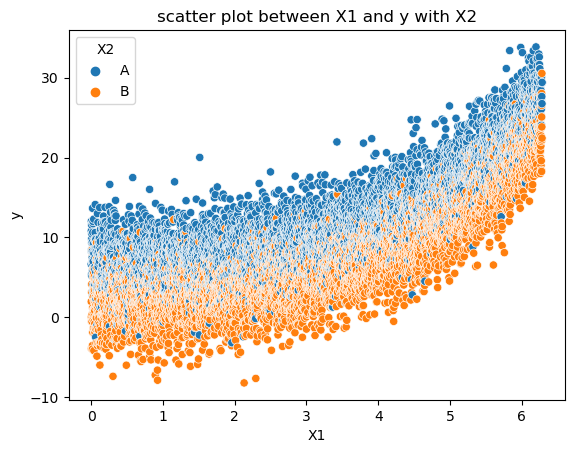

In [32]:
plt.title('scatter plot between X1 and y with X2')
sns.scatterplot(data=df, x='X1', y='y', hue='X2')

<Axes: title={'center': 'Scatter plot between X1 and y with 500 samples'}, xlabel='X1', ylabel='y'>

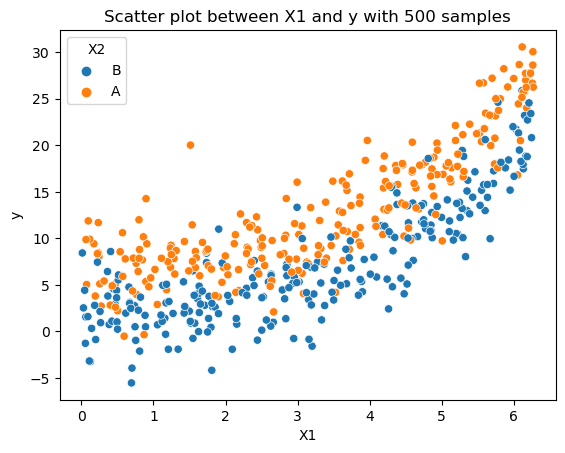

In [33]:
plt.title('Scatter plot between X1 and y with 500 samples')

sns.scatterplot(data=df.sample(500), x='X1', y='y', hue='X2')

#### Todo:
The scatter plot explains the relationship between two variables, X1 and y, with a total of 500 samples.
There are two distinct categories of data points represented by different colors:
Category A: These data points are associated with a variable labeled X2.
Category B: These data points are also associated with the same variable, X2.
As the value of X1 increases, the corresponding y value also increases for both categories. This suggests a positive relation between X1 and y.
The data points are more densely packed between X1 values of 4 to 6 on the x-axis.
the scatter plot indicates that as X1 increases, y tends to increase as well.

In [59]:
X = df[['X1', 'X2']]
y = df.y

In [60]:
X.head()

,X1,X2
0,0.000000,A
1,0.000628,B
2,0.001257,A
3,0.001885,A
4,0.002514,B


In [61]:
model = LinearRegression()
model.fit(X[['X1']], y)

model.score(X[['X1']], y)

0.5864675145997984

In [62]:
y_pred = model.predict(X[['X1']])
r2_score( y, y_pred)

0.5864675145997984

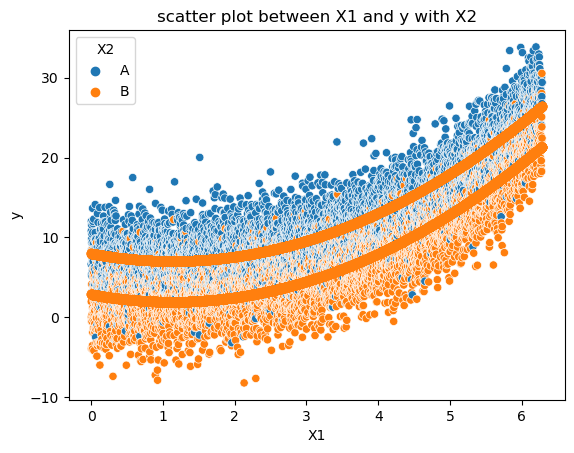

In [84]:
# todo: add a proper title
# to see the difference
#plt.scatter(X_data[:, 1], y)
#plt.scatter(X.X1, y_pred)
plt.title('scatter plot between X1 and y with X2')
sns.scatterplot(data=df, x='X1', y='y', hue='X2')

plt.scatter(X.X1, y_pred)

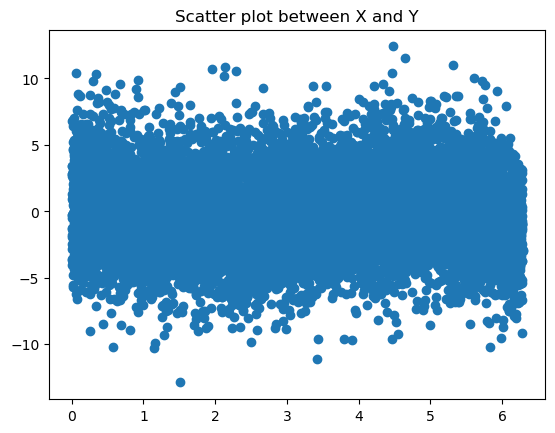

In [82]:
# todo: add a proper title
plt.title("Scatter plot between X and Y")

plt.scatter(X.X1, y_pred-y)

<Axes: title={'center': 'Distrubution of predicted errors'}>

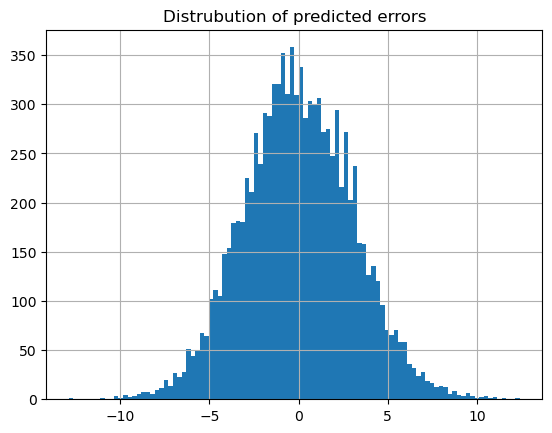

In [86]:
# todo: add a proper title
plt.title("Distrubution of predicted errors")
(y_pred-y).hist(bins=100)

#### Todo:
The histogram plot seems to show prediction errors, with the x-axis showing the difference between predicted values (y_pred) and actual values (y). The peak around 0 suggests that the model’s predictions are centered, but there is variability in the errors.in order to statderise we can perform polynomial regression by transforming the input feature 'X1' into polynomial features up to the second degree trains a linear regression model on the transformed data, and then evaluates the model's performance using the R^2 score. This approach allows the model to capture non-linear relationships between the input feature and the target variable.

In [87]:
# todo: explain the code below, what we do & why we do it?

transform = PolynomialFeatures(degree=2)

X_data = transform.fit_transform(X[['X1']])

model = LinearRegression()
model.fit(X_data, y)

model.score(X_data, y)

0.6813188328042218

In [88]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.6813188328042218

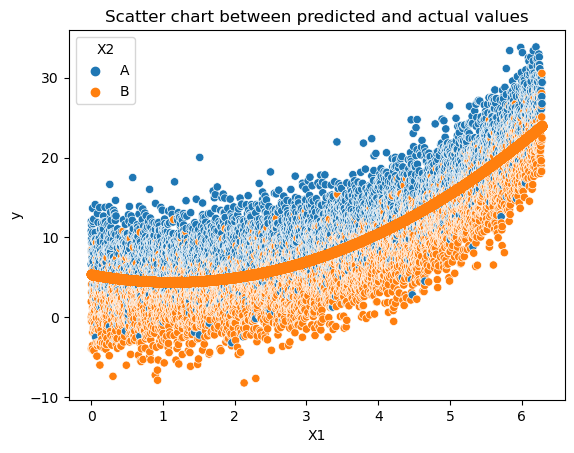

In [90]:
# todo: add a proper title

# plt.scatter(X_data[:, 1], y)
# plt.scatter(X_data[:, 1], y_pred)
plt.title("Scatter chart between predicted and actual values")
sns.scatterplot(data=df, x='X1', y='y', hue='X2')
plt.scatter(X.X1, y_pred)

<Axes: >

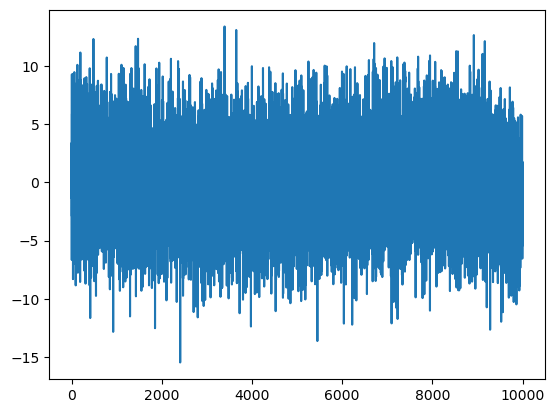

In [69]:
# todo: add a proper title

(y_pred-y).plot()

<Axes: >

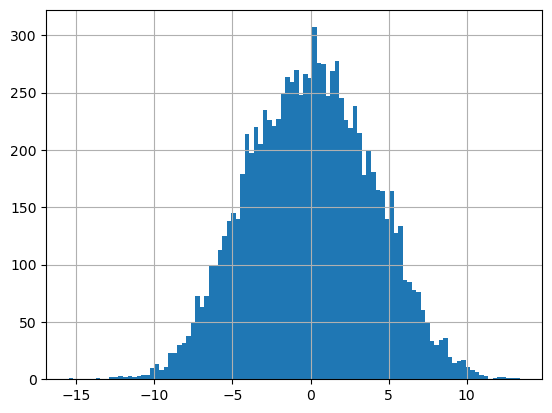

In [70]:
# todo: add a proper title

(y_pred-y).hist(bins=100)

### Todo:
Explain findings in the above graphs & what can we do next?

##  Finally:

In [71]:
## to see the difference
# encoder = OneHotEncoder()

# categorical_features = ['X2']
# encoded = encoder.fit_transform(X[categorical_features])

# pd.DataFrame(
#     data=encoded.todense(),
#     columns=encoder.get_feature_names_out()
# ).head()

In [72]:
encoder = OneHotEncoder(drop='first')

categorical_features = ['X2']
encoded = encoder.fit_transform(X[categorical_features])

In [73]:
encoded_df = pd.DataFrame(
    data=encoded.todense(),
    columns=encoder.get_feature_names_out()
)

In [74]:
encoded_df.head()

,X2_B
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0


In [75]:
# todo: explain the code

numerical_features = ['X1']
X_new = X[numerical_features].join(encoded_df)
X_new.head()

,X1,X2_B
0,0.000000,0.0
1,0.000628,1.0
2,0.001257,0.0
3,0.001885,0.0
4,0.002514,1.0


In [76]:
# todo: explain the code

poly = PolynomialFeatures()
X_data = poly.fit_transform(X_new)

model = LinearRegression()
model.fit(X_data, y)

model.score(X_data, y)

0.8121063112650809

In [77]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.8121063112650809

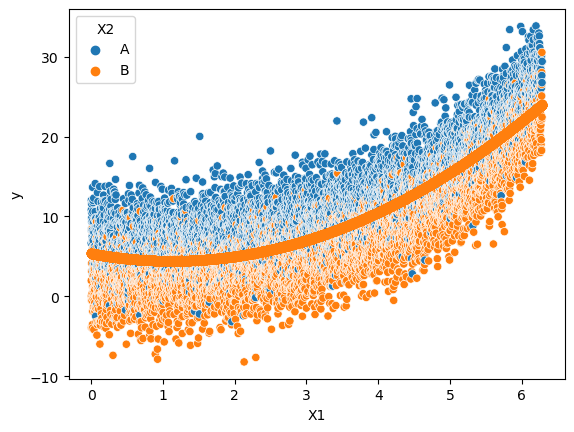

In [91]:
# todo: add a proper title


# plt.scatter(X_new.X1, y)
# plt.scatter(X_new.X1, y_pred)

sns.scatterplot(data=df, x='X1', y='y', hue='X2')
plt.scatter(X_new.X1, y_pred)

<Axes: >

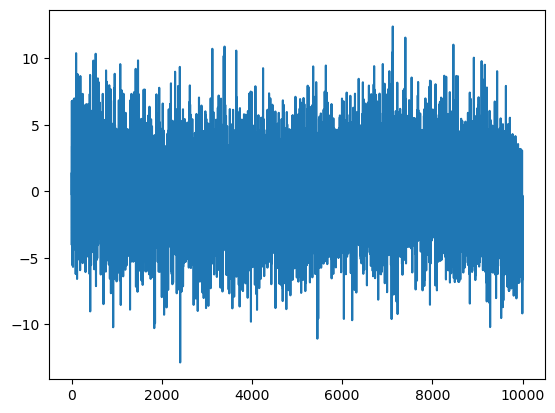

In [79]:
# todo: add a proper title

(y_pred-y).plot()

<Axes: >

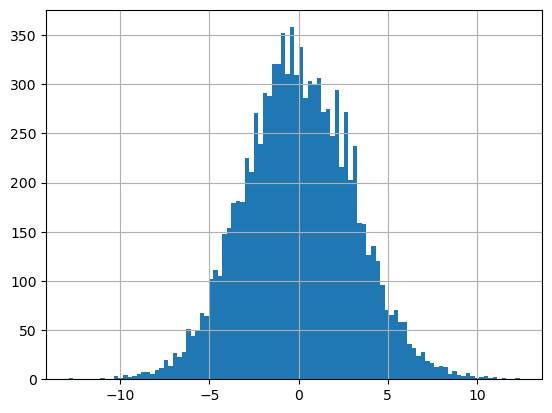

In [80]:
# todo: add a proper title

(y_pred-y).hist(bins=100)

#### Todo:
explain results

## Create a train-test split

In [28]:
# code

X_training, X_test, y_training, y_test = #code

print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

SyntaxError: invalid syntax (3610169018.py, line 3)

 ## Train a linear regression model
  
 * Perform the model training on training set, follow the steps after `Finally` on the training set.
 * Get the r2_score on the test set.

 Important note: When transforming use `transform` NOT `fit_transform`

 __eg:__ `encoded = encoder.transform(X_test[categorical_features])`
     

In [ ]:
# code

## Create a pipeline

Add comments to `todo` parts

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

cat_vars = ['X2']
num_vars = ['X1']

# todo
num_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2))
])

# todo
cat_pipeline = Pipeline([
    ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# todo
processing_pipeline = ColumnTransformer(transformers=[
    ('num pipeline', num_pipeline, num_vars),
    ('cat pipeline', cat_pipeline, cat_vars)
])

modeling_pipeline = Pipeline([('data_processing', processing_pipeline),
                              ('lm', LinearRegression())
                             ])

print(modeling_pipeline)

In [57]:
modeling_pipeline.fit(X_training, y_training)

NameError: name 'modeling_pipeline' is not defined

In [58]:
modeling_pipeline.score(X_test, y_test)

NameError: name 'modeling_pipeline' is not defined

## Evaluate/create residual plots

In [ ]:
y_pred = modeling_pipeline.predict(X_test)

In [ ]:
# code

## Explain findings

In [ ]:
# code